# ECG Heartbeat Categorization 
- Name: La Thị Thùy Chi
- ID: BA12-026


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
# File paths
train_path = "D:/Downloads/D/USTH/B3/Machine Learning in Medicine/ECG/archive/mitbih_train.csv"
test_path = "D:/Downloads/D/USTH/B3/Machine Learning in Medicine/ECG/archive/mitbih_test.csv"

# Load datasets
df_train = pd.read_csv(train_path, header=None)
df_test = pd.read_csv(test_path, header=None)


In [5]:

# Dataset info
df_train.shape
df_test.shape

(21892, 188)

In [6]:
# Check for missing values
df_train.isnull().sum().sum()
df_test.isnull().sum().sum()


0

In [7]:
# Display first few rows
df_train.head()
df_test.head()


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


C:\Users\admin\AppData\Local\Temp\ipykernel_22904\55677713.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train_label_counts.index, y=train_label_counts.values, palette="viridis")


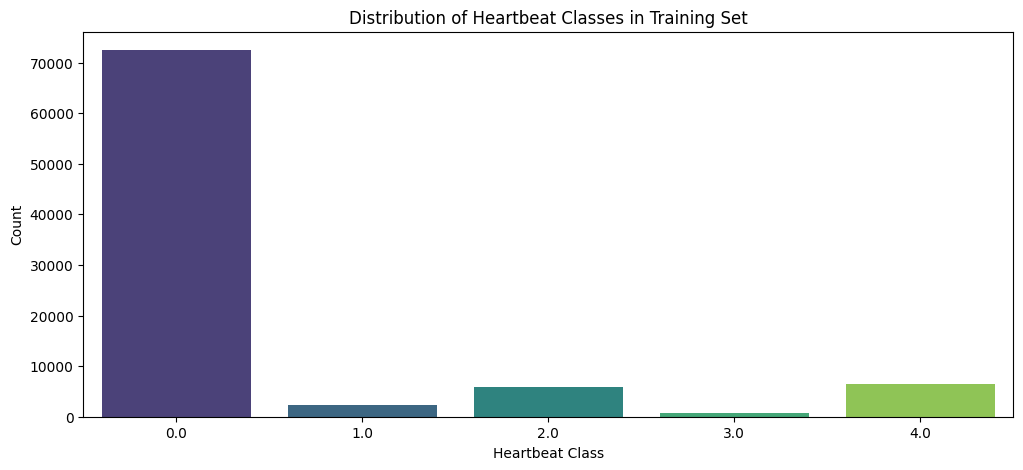

In [9]:
# Count label distribution (last column is the label)
train_label_counts = df_train.iloc[:, -1].value_counts()
test_label_counts = df_test.iloc[:, -1].value_counts()

# Plot label distribution
plt.figure(figsize=(12, 5))
sns.barplot(x=train_label_counts.index, y=train_label_counts.values, palette="viridis")
plt.xlabel("Heartbeat Class")
plt.ylabel("Count")
plt.title("Distribution of Heartbeat Classes in Training Set")
plt.show()





In [10]:
# Reshape data for CNN input (Assuming 1D ECG signals)
X_train, y_train = df_train.iloc[:, :-1].values, df_train.iloc[:, -1].values
X_test, y_test = df_test.iloc[:, :-1].values, df_test.iloc[:, -1].values

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Reshape to fit CNN input (samples, timesteps, channels)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [12]:
# Define CNN model
model = keras.Sequential([
    keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(len(np.unique(y_train)), activation='softmax')  # Multi-class classification
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"Test Accuracy: {test_acc}")
print(f"Test Loss: {test_loss}")

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9354 - loss: 0.2365 - val_accuracy: 0.9726 - val_loss: 0.1002
Epoch 2/10
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9745 - loss: 0.0892 - val_accuracy: 0.9739 - val_loss: 0.0953
Epoch 3/10
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9811 - loss: 0.0656 - val_accuracy: 0.9787 - val_loss: 0.0861
Epoch 4/10
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9834 - loss: 0.0547 - val_accuracy: 0.9788 - val_loss: 0.0822
Epoch 5/10
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9867 - loss: 0.0444 - val_accuracy: 0.9810 - val_loss: 0.0733
Epoch 6/10
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9878 - loss: 0.0375 - val_accuracy: 0.9817 - val_loss: 0.0824
Epoch 7/10
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9902 - loss: 0.0312 - val_accuracy: 0.9809 - val_loss: 0.0809
Epoch 8/10
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9910 - loss: 0

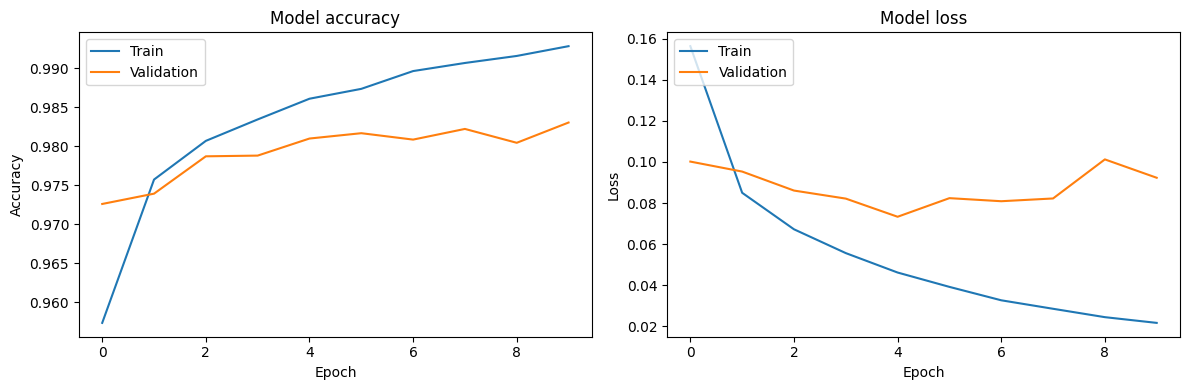

685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [13]:
# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Making predictions
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)





In [14]:
# Evaluate using classification report and confusion matrix
from sklearn.metrics import classification_report

# Generate and print classification report
print("Classification Report:")
print(classification_report(y_test, predicted_classes))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     18118
         1.0       0.89      0.76      0.82       556
         2.0       0.95      0.95      0.95      1448
         3.0       0.84      0.73      0.78       162
         4.0       0.99      0.98      0.99      1608

    accuracy                           0.98     21892
   macro avg       0.93      0.88      0.91     21892
weighted avg       0.98      0.98      0.98     21892

